# Optical Interconnection Network - DNN - Regression (original version)

*This is the original version of the project which contains all 640 data samples. The purpose of this script is to illustrate what happens when data is not properly analyzed for any inconsistent values and how it affects the performance of any Machine Learning model.

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## 2. Load and Summarize Data

In [2]:
# Load dataframe (df) into appropriate format
df = pd.read_csv('optical_interconnection_network.csv', sep=';', decimal=',')
# Remove unnamed columsn identified by (;)
df = df.loc[:, ~df.columns.str.match('^Unnamed')]
# Get values for matrix of features (X) and dependent variable (y)
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

print(X.shape, y.shape)

(640, 9) (640,)


In [3]:
df

,Node Number,Thread Number,Spatial Distribution,Temporal Distribution,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization
0,64,4,UN,Client-Server,0.1,0.839546,1.974686,308.491814,700.514102,0.352431
1,64,4,UN,Client-Server,0.2,0.827412,9.556437,291.037663,864.599227,0.506302
2,64,4,UN,Client-Server,0.3,0.802605,27.027618,264.928002,839.372851,0.638516
3,64,4,UN,Client-Server,0.4,0.723403,61.848511,235.776888,1256.053108,0.767051
4,64,4,UN,Client-Server,0.5,0.721210,121.085884,189.680044,1343.875577,0.807812
...,...,...,...,...,...,...,...,...,...,...
635,16,10,PS,Asynchronous,0.6,0.792340,532.737732,363.094043,1214.057768,0.961042
636,16,10,PS,Asynchronous,0.7,0.707199,751.675110,224.638088,1653.736882,0.981944
637,16,10,PS,Asynchronous,0.8,0.618230,905.326843,206.922631,1421.304936,0.962500
638,16,10,PS,Asynchronous,0.9,0.564482,1048.269897,154.713952,2371.043062,0.979375


#### Spatial Distribution:

- UN: Uniform
- HR: Hot Region
- BR: Bit Reverse
- PS: Perfect Shuffle

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Node Number             640 non-null    int64  
 1   Thread Number           640 non-null    int64  
 2   Spatial Distribution    640 non-null    object 
 3   Temporal Distribution   640 non-null    object 
 4   T/R                     640 non-null    float64
 5   Processor Utilization   640 non-null    float64
 6   Channel Waiting Time    640 non-null    float64
 7   Input Waiting Time      640 non-null    float64
 8   Network Response Time   640 non-null    float64
 9   Channel Utilization     640 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 50.1+ KB


In [5]:
# Check for missing values
df.isnull().sum()

Node Number               0
Thread Number             0
Spatial Distribution      0
Temporal Distribution     0
T/R                       0
Processor Utilization     0
Channel Waiting Time      0
Input Waiting Time        0
Network Response Time     0
Channel Utilization       0
dtype: int64

In [6]:
df.describe()

,Node Number,Thread Number,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization
count,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000,640.000000
mean,40.000000,7.000000,0.550000,0.649013,377.459157,333.247102,1504.247529,26.347886
std,24.018772,2.237817,0.287453,0.194737,381.974899,233.721860,1202.606968,223.782214
min,16.000000,4.000000,0.100000,0.202377,0.950721,33.036130,0.529210,0.136979
25%,16.000000,5.500000,0.300000,0.492530,29.247560,137.730986,580.676198,0.587539
50%,40.000000,7.000000,0.550000,0.624787,265.614624,261.855556,1232.150369,0.773611
75%,64.000000,8.500000,0.800000,0.833106,664.965408,485.943680,2115.326618,0.905573
max,64.000000,10.000000,1.000000,0.986516,1627.330246,892.852416,6065.736672,2895.323131


## 3. Visualize Data

#### Pairwise relationships between features

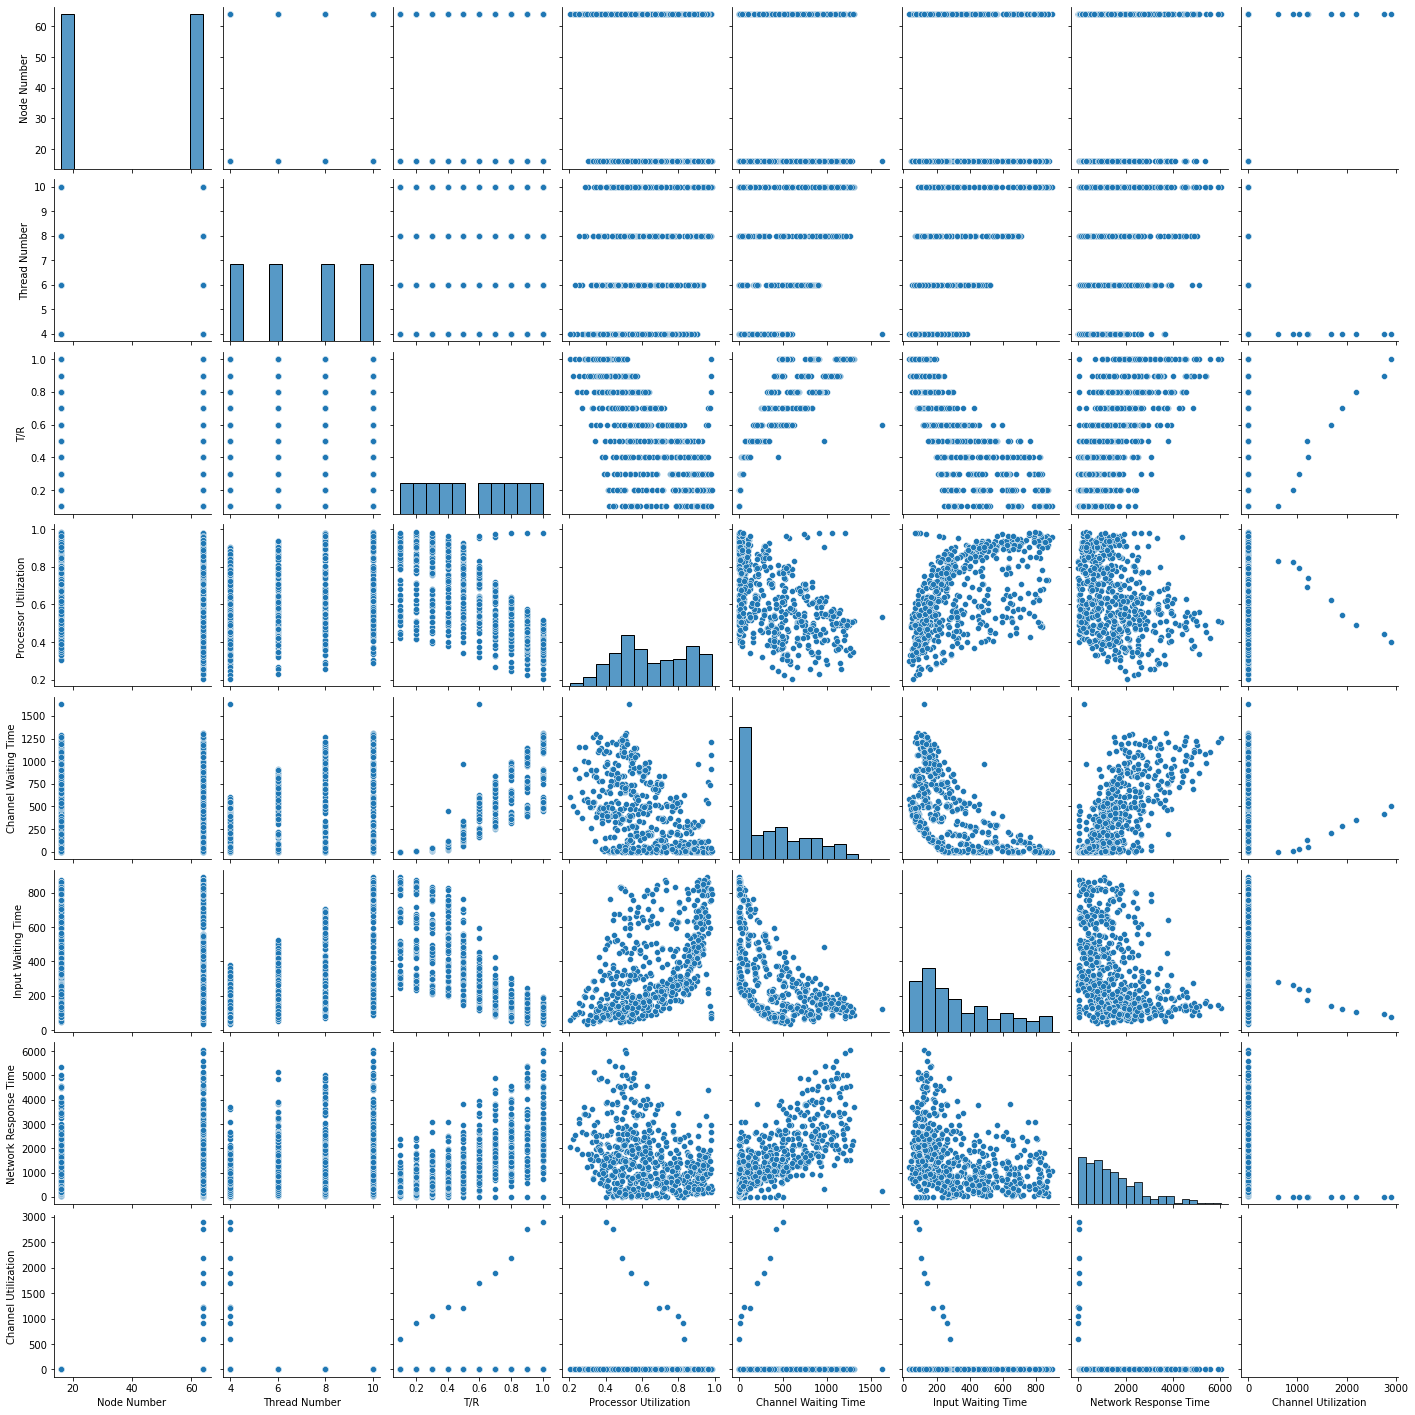

In [7]:
# Pairwise distributions
sns.pairplot(df)
plt.show()

#### Channel Utilization per Spatial Distribution

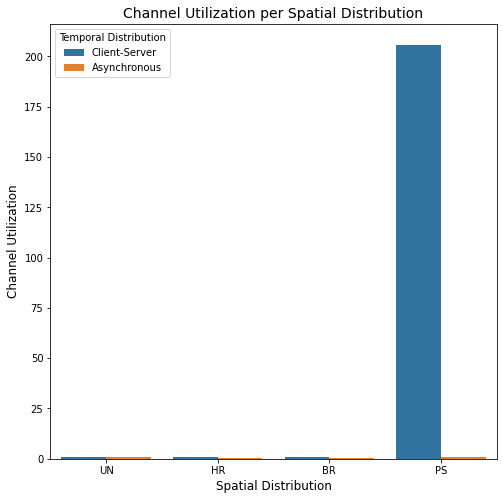

In [8]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['Spatial Distribution'], y=df['Channel Utilization'], 
            hue=df['Temporal Distribution'], ci=None)
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Channel Utilization', fontsize=12)
plt.title('Channel Utilization per Spatial Distribution', fontsize=14)
plt.show()

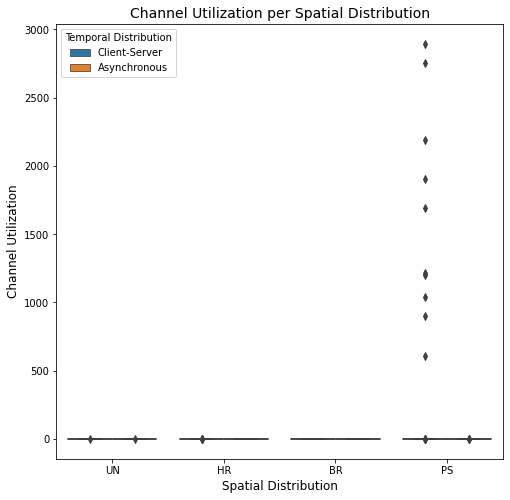

In [9]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df['Spatial Distribution'], y=df['Channel Utilization'], 
            hue=df['Temporal Distribution'])
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Channel Utilization', fontsize=12)
plt.title('Channel Utilization per Spatial Distribution', fontsize=14)
plt.show()

#### Channel Waiting Time per Spatial Distribution

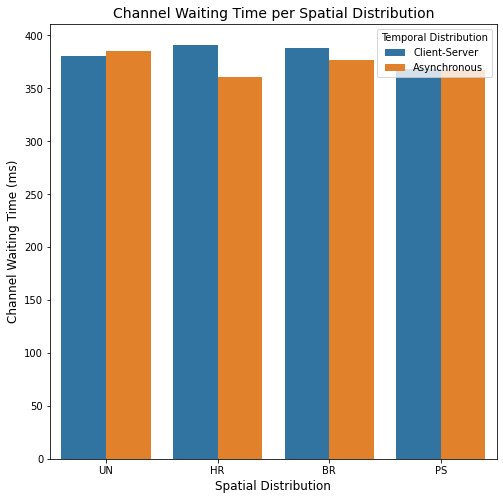

In [10]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['Spatial Distribution'], y=df['Channel Waiting Time'], 
            hue=df['Temporal Distribution'], ci=None)
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Channel Waiting Time (ms)', fontsize=12)
plt.title('Channel Waiting Time per Spatial Distribution', fontsize=14)
plt.show()

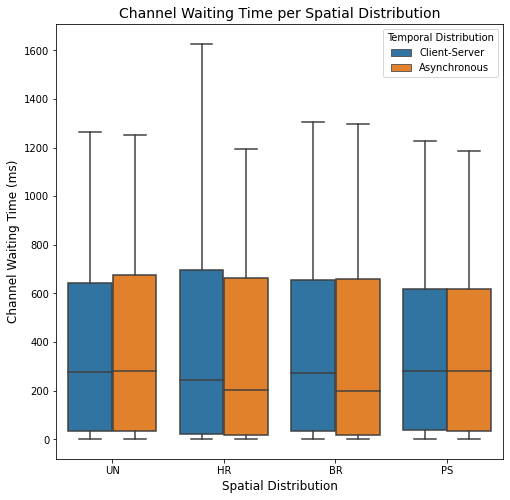

In [11]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df['Spatial Distribution'], y=df['Channel Waiting Time'], 
            hue=df['Temporal Distribution'])
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Channel Waiting Time (ms)', fontsize=12)
plt.title('Channel Waiting Time per Spatial Distribution', fontsize=14)
plt.show()

#### Processor Utilization per Spatial Distribution

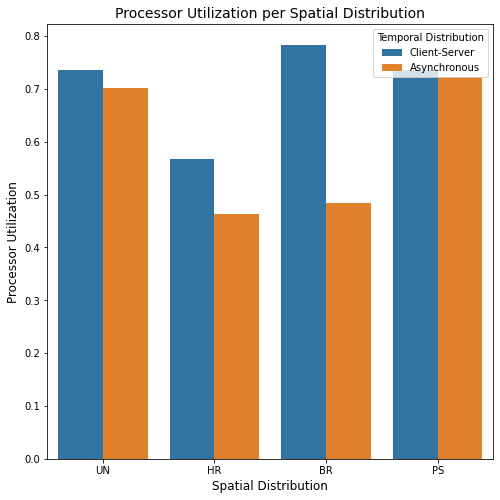

In [12]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['Spatial Distribution'], y=df['Processor Utilization '], 
            hue=df['Temporal Distribution'], ci=None)
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Processor Utilization', fontsize=12)
plt.title('Processor Utilization per Spatial Distribution', fontsize=14)
plt.show()

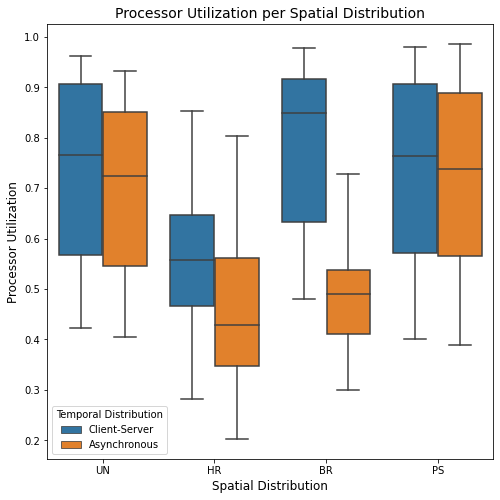

In [13]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df['Spatial Distribution'], y=df['Processor Utilization '], 
            hue=df['Temporal Distribution'])
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Processor Utilization', fontsize=12)
plt.title('Processor Utilization per Spatial Distribution', fontsize=14)
plt.show()

#### Network Response Time per Spatial Distribution

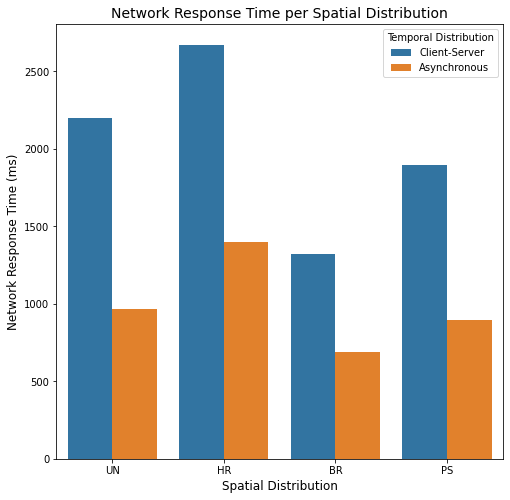

In [14]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['Spatial Distribution'], y=df['Network Response Time'], 
            hue=df['Temporal Distribution'], ci=None)
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Network Response Time (ms)', fontsize=12)
plt.title('Network Response Time per Spatial Distribution', fontsize=14)
plt.show()

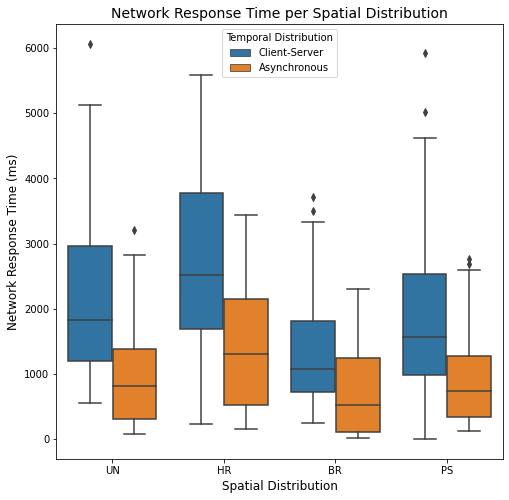

In [15]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df['Spatial Distribution'], y=df['Network Response Time'], 
            hue=df['Temporal Distribution'])
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Network Response Time (ms)', fontsize=12)
plt.title('Network Response Time per Spatial Distribution', fontsize=14)
plt.show()

#### Input Waiting Time per Spatial Distribution

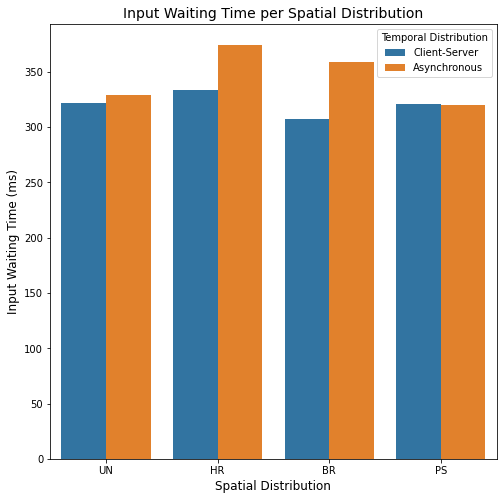

In [16]:
plt.figure(figsize=(8,8))
sns.barplot(x=df['Spatial Distribution'], y=df['Input Waiting Time'], 
            hue=df['Temporal Distribution'], ci=None)
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Input Waiting Time (ms)', fontsize=12)
plt.title('Input Waiting Time per Spatial Distribution', fontsize=14)
plt.show()

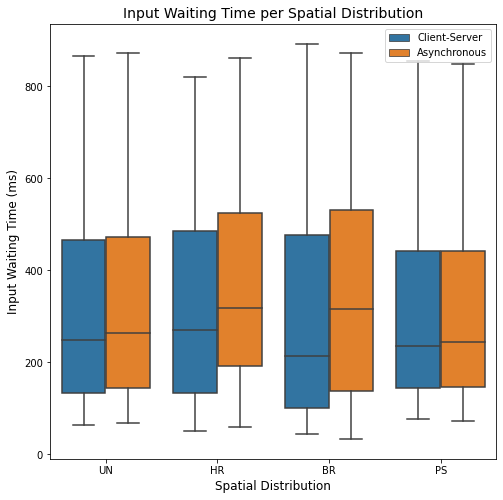

In [17]:
plt.figure(figsize=(8,8))
sns.boxplot(x=df['Spatial Distribution'], y=df['Input Waiting Time'], 
            hue=df['Temporal Distribution'])
plt.xlabel('Spatial Distribution', fontsize=12)
plt.ylabel('Input Waiting Time (ms)', fontsize=12)
plt.title('Input Waiting Time per Spatial Distribution', fontsize=14)
plt.legend(loc='upper right')
plt.show()

#### Correlation Map

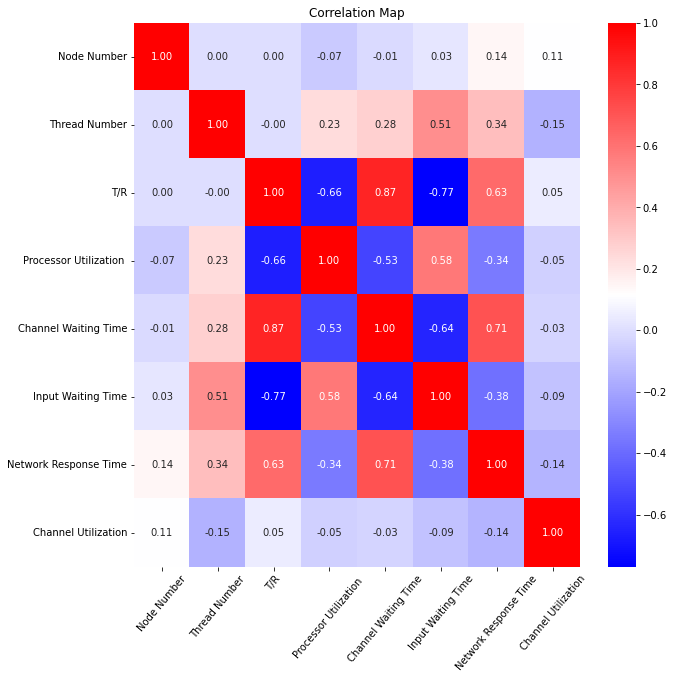

In [18]:
# Correlation Map
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='bwr', annot=True, fmt = ".2f")
plt.xticks(rotation=50)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

## 4. Data Preprocessing and Feature Engineering

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
# Label Encode the Spatial Distribution column
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
# X[:, 3] = le.fit_transform(X[:, 3])

In [21]:
# One-Hot Encode the Temporal Distribution column
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [22]:
X[:5, :]

array([[0.0, 1.0, 64, 4, 3, 0.1, 0.8395459999999999, 1.9746860000000002,
        308.49181400000003, 700.514102],
       [0.0, 1.0, 64, 4, 3, 0.2, 0.827412, 9.556436999999999, 291.037663,
        864.5992269999999],
       [0.0, 1.0, 64, 4, 3, 0.3, 0.802605, 27.027618, 264.928002,
        839.372851],
       [0.0, 1.0, 64, 4, 3, 0.4, 0.723403, 61.848511, 235.77688799999999,
        1256.053108],
       [0.0, 1.0, 64, 4, 3, 0.5, 0.72121, 121.08588400000001,
        189.68004399999998, 1343.875577]], dtype=object)

In [23]:
# Split dataframe (df) into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

In [24]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 5. Define DNN Model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                880       
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dense_2 (Dense)             (None, 60)                4860      
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 12,281
Trainable params: 12,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
16/16 [==============================] -

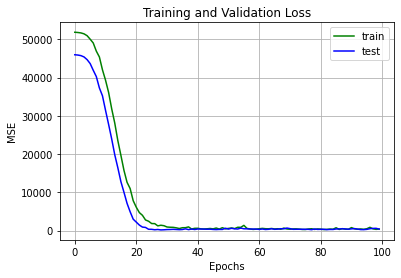

In [26]:
# Define model
reg = Sequential()

# Add layers
reg.add(Dense(units=80, activation='relu', input_dim=X.shape[1]))
reg.add(Dense(units=80, activation='relu'))
reg.add(Dense(units=60, activation='relu'))
reg.add(Dropout(0.02))

reg.add(Dense(units=1))

# Compile model
reg.compile(optimizer='adam', loss='mse')

# Summarize model
reg.summary()

# Train model
history = reg.fit(X_train, y_train, batch_size=32, epochs=100, 
                  validation_data=(X_test, y_test))

# Plot loss during training
plt.plot(history.history['loss'], 'g', label='train')
plt.plot(history.history['val_loss'], 'b', label='test')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid()
plt.show()

In [27]:
# Predict test set results
y_pred = reg.predict(X_test)

# Summarize results
print('MAE: %.3f' % (mean_absolute_error(y_test, y_pred)))
print('MSE: %.3f' % (mean_squared_error(y_test, y_pred)))
print('RMSE: %.3f' % (mean_squared_error(y_test, y_pred, squared=False)))
print('R^2 Score: %.3f' % (r2_score(y_test, y_pred)))

MAE: 3.408
MSE: 372.879
RMSE: 19.310
R^2 Score: 0.992


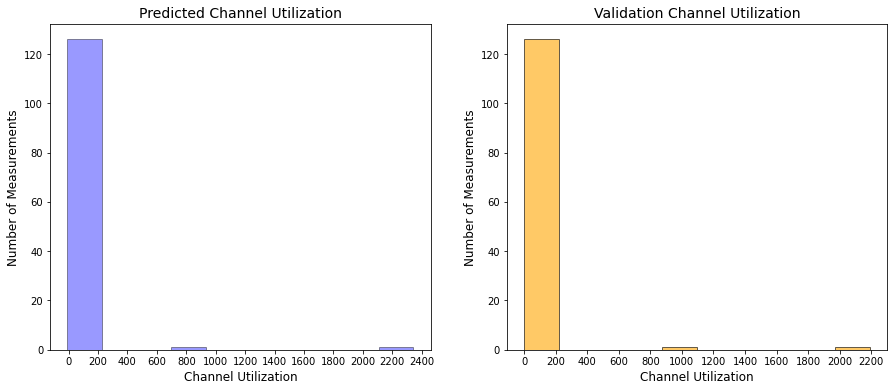

In [28]:
# Plot histogram for y_pred
fig1 = plt.figure(figsize=(15, 6))
ax1 = fig1.add_subplot(1, 2, 1)
plt.xticks(np.arange(0, 2600, 200))
plt.yticks(np.arange(0, 160, 20))
plt.hist(x=y_pred, facecolor='blue', alpha=0.4, edgecolor='black')
plt.xlabel('Channel Utilization', fontsize=12)
plt.ylabel('Number of Measurements', fontsize=12)
plt.title('Predicted Channel Utilization', fontsize=14)

# Plot histogram for y_test
ax1 = fig1.add_subplot(1, 2, 2)
plt.xticks(np.arange(0, 2600, 200))
plt.yticks(np.arange(0, 160, 20))
plt.hist(x=y_test, facecolor='orange', alpha=0.6, edgecolor='black')
plt.xlabel('Channel Utilization', fontsize=12)
plt.ylabel('Number of Measurements', fontsize=12)
plt.title('Validation Channel Utilization', fontsize=14)

# Show subplot
plt.show()

## 6. Sample Results

<table border = "1">
  <thead>
    <th colspan = "3">Sample Neural Network Regression Scores</th>
  </thead>
    <tr>
      <td><b>MAE</b></td>
      <td>3.408</td>
    </tr>
    <tr>
      <td><b>MSE</b></td>
      <td>372.879</td>
    </tr>
    <tr>
      <td><b>RMSE</b></td>
      <td>19.310</td>
    </tr>
    <tr>
      <td><b>R^2</b></td>
      <td>0.992</td>
    </tr>
  </tbody>
</table>

Note: These results will vary due to the random nature of Deep Learning.

## 7. Remarks

*   According to the prediciton results above, the 10 outliers originally present significantly affects the performance of the DNN model.
*   These outliers can be described as random statistical noise or interference in the data. The neural network architecture present works well for an ideal case, but is severely affected by data "spikes." Thus, additional work should be done in order to obtain more consistent results.